In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
gs = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [3]:
test = test.merge(gs, how='left', on='PassengerId')

In [4]:
df = pd.concat([train, test], axis = 0).reset_index(drop=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Step 1: **Analyzing and Cleaning Dataset**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,NaN,NaN,NaN,655.0,378.020061,1.0,328.0,655.0,982.0,1309.0
Survived,1309.0,NaN,NaN,NaN,0.377387,0.484918,0.0,0.0,0.0,1.0,1.0
Pclass,1309.0,NaN,NaN,NaN,2.294882,0.837836,1.0,2.0,3.0,3.0,3.0
Name,1309,1307,"Connolly, Miss. Kate",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,1309,2,male,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1046.0,NaN,NaN,NaN,29.881138,14.413493,0.17,21.0,28.0,39.0,80.0
SibSp,1309.0,NaN,NaN,NaN,0.498854,1.041658,0.0,0.0,0.0,1.0,8.0
Parch,1309.0,NaN,NaN,NaN,0.385027,0.86556,0.0,0.0,0.0,0.0,9.0
Ticket,1309,929,CA. 2343,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,1308.0,NaN,NaN,NaN,33.295479,51.758668,0.0,7.8958,14.4542,31.275,512.3292


In [7]:
df['Survived'].value_counts(normalize=True)

0    0.622613
1    0.377387
Name: Survived, dtype: float64

In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

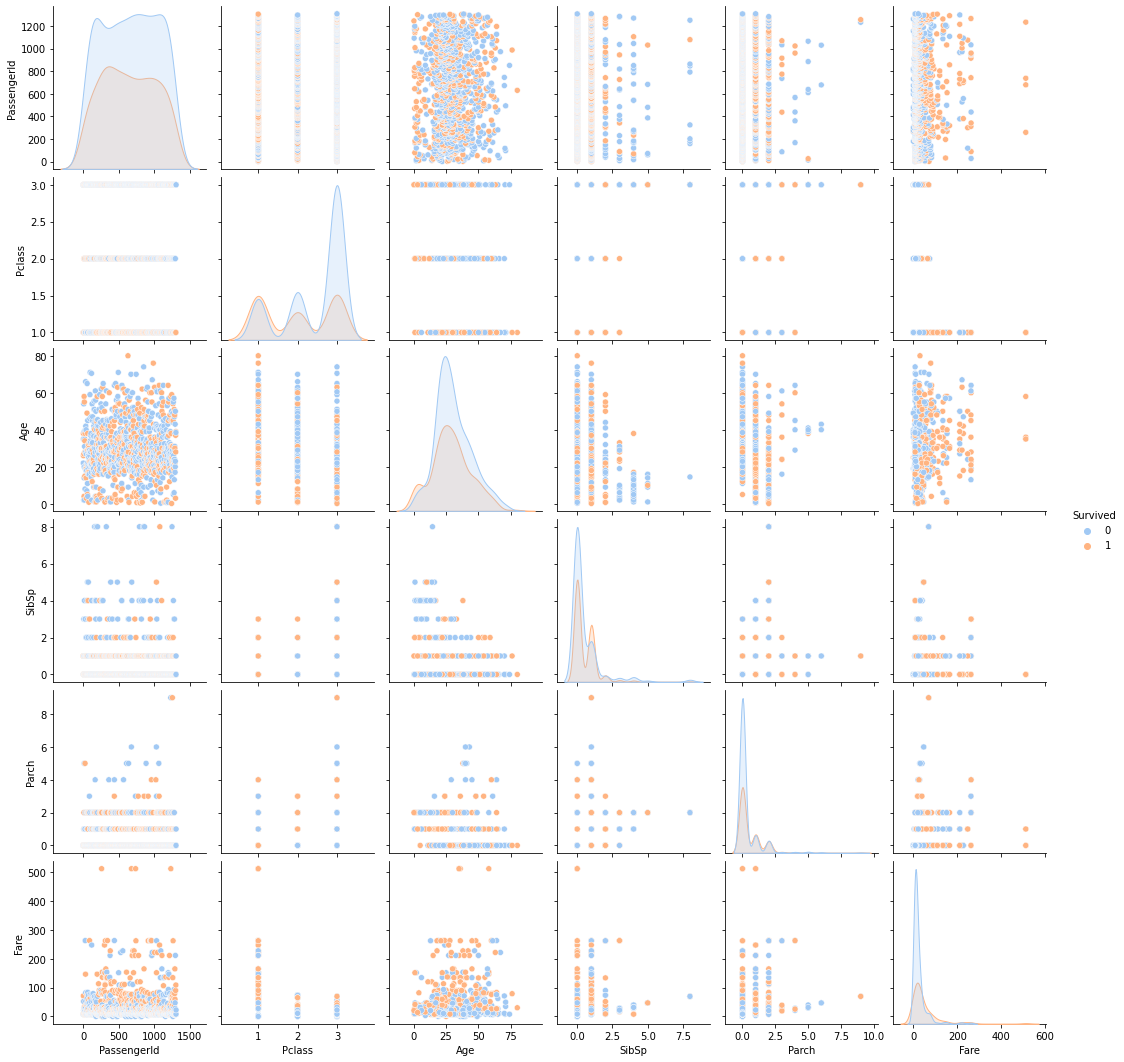

In [9]:
import seaborn as sns
sns.pairplot(df, hue="Survived", palette='pastel')

In [10]:
object_df = [i for i in df.columns if df[i].dtypes == 'object']
object_df

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [11]:
x = df["Age"].median()
df["Age"].fillna(x, inplace = True)

y = df["Fare"].median()
df["Fare"].fillna(y, inplace = True)

df["Embarked"].fillna(method="ffill", inplace = True)

In [12]:
df.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.774637
Embarked       0.000000
dtype: float64

In [13]:
df = df.drop(columns=['Cabin', 'Name', 'Ticket'], axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,male,28.0,0,0,8.0500,S
1305,1306,1,1,female,39.0,0,0,108.9000,C
1306,1307,0,3,male,38.5,0,0,7.2500,S
1307,1308,0,3,male,28.0,0,0,8.0500,S


In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
enc = OneHotEncoder(sparse=False)
columns_to_one_hot = ['Sex','Embarked']
encoded_array = enc.fit_transform(df.loc[:,columns_to_one_hot])
df_encoded = pd.DataFrame(encoded_array,columns=enc.get_feature_names_out() )
df_encoded = pd.concat([df,df_encoded],axis=1)
df_encoded.drop(labels= columns_to_one_hot,axis=1,inplace=True)
df_encoded

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,28.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0
1305,1306,1,1,39.0,0,0,108.9000,1.0,0.0,1.0,0.0,0.0
1306,1307,0,3,38.5,0,0,7.2500,0.0,1.0,0.0,0.0,1.0
1307,1308,0,3,28.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0
